In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve
import matplotlib as mpl

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [2]:
data = np.transpose(np.loadtxt('txts/cmErecoilE771.txt'))
cmE = data[0]
recoilE = data[1]

In [3]:
#til at slå op i masses.dat
data = np.transpose(np.loadtxt("masses.txt"))

N=data[0]
Z=data[1]
A=data[2]
massExcess=data[3]
bEPrNkl=data[4]

mp = 938.272*1000
me = 0.510998*1000
mn = 939.565*1000

def me2(a, z):
    a_indices = np.where(A == a)
    z_indices = np.where(Z == z)
    a = lambda: print('Could not find mass excess for given numbers')
    for i in range(len(a_indices[0])):
        if np.any(z_indices[0] == a_indices[0][i]):
            me = bEPrNkl[a_indices[0][i]]
            a = lambda: me
    return a()

def m2(a,z): 
    return mp*z+(a-z)*mn-me2(a,z)*a

def cmEcalc(accE,mb,mt,ml,ms):
    beta = np.sqrt(((accE+mb)**2-mb**2))/(accE+mb+mt)
    pz = np.sqrt((accE+mb)**2-mb**2)
    en = accE + mb + mt
    gamma = 1/np.sqrt(1-beta**2)
    pzCM = gamma*(pz - beta*en)
    enCM = gamma*(en - beta*pz)
    return (enCM**2+ms**2-ml**2)/(2*enCM)-ms

def exOcalc(T,mHe,mC,mO):
    a = -1
    b = (2*T+2*mHe)
    c = mC**2 - mHe**2
    Ecm = (-b-np.sqrt(b**2 - 4* a * c))/(2*a)
    return Ecm - mO

mp = 938272.08816
mAl = m2(27,13)
mO = m2(16,8)
mN16 = m2(16,7)
mC13 = m2(13,6)
mO17 = m2(17,8)
mO18 = m2(18,8)
mN15 = m2(15,7)
mN14 = m2(14,7)
mN = m2(15,7)
mC = m2(12,6)
mHe = m2(4,2)
mF = m2(19,9)
mMg = m2(24,12)
mLi = m2(7,3)

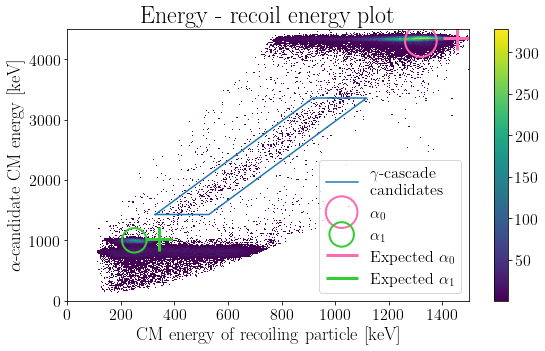

In [4]:
fig, ax = plt.subplots(figsize = [9,5])
hist = ax.hist2d(recoilE,cmE,bins = [500,500], cmin = 1) #norm=mpl.colors.LogNorm()
fig.colorbar(hist[3], ax=ax)
ax.set_xlabel('CM energy of recoiling particle [keV]')
ax.set_ylabel(r'$\alpha$-candidate CM energy [keV]')
ax.set_ylim(0,4500)
ax.set_xlim(0,1500)
ax.set_title('Energy - recoil energy plot')

a1 = cmEcalc(771*1.169,mp,mN15,mC+4440,mHe)
a0 = cmEcalc(771*1.169,mp,mN15,mC,mHe)
c1 = cmEcalc(771*1.169,mp,mN15,mHe,mC+4440)
c0 = cmEcalc(771*1.169,mp,mN15,mHe,mC)

ax.scatter(1320,4300,s=1000,facecolors='none', edgecolors='hotpink', linewidth = 2, label = r'$\alpha_0$')
ax.scatter(250,1000,s=600,facecolors='none', edgecolors='limegreen', linewidth = 2, label = r'$\alpha_1$')

ax.plot([c1*1.25-100,c1*1.25+100,c0*0.7+100,c0*0.7-100,c1*1.25-100],[a1+400,a1+400,a0-1000,a0-1000,a1+400], label = r'$\gamma$-cascade' + '\n' + 'candidates')

ax.hlines(a0,c0-50,c0+50,color='hotpink',label = r'Expected $\alpha_0$',linewidth = 3)
ax.hlines(a1,c1-50,c1+50,color='limegreen',label = r'Expected $\alpha_1$',linewidth = 3)
ax.vlines(c0,a0+200,a0-200,color='hotpink',linewidth = 3)
ax.vlines(c1,a1+200,a1-200,color='limegreen',linewidth = 3)
ax.legend()
plt.savefig('txtHists/energyrecoilenergy.png',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)

In [5]:
len(cmE)

175355

In [6]:
a1 expected + 100, 0.9*c1 +- 100
a0 expected - 450, 0.83*c0 +-100

SyntaxError: invalid syntax (2520678176.py, line 1)

In [ ]:
0.084167
910.649
0.084167
893.815

In [ ]:
400*3.093+483

In [9]:
#til at slå op i masses.dat
data = np.transpose(np.loadtxt("masses.txt"))

N=data[0]
Z=data[1]
A=data[2]
massExcess=data[3]
bEPrNkl=data[4]

mp = 938.272*1000
me = 0.510998*1000
mn = 939.565*1000

def me2(a, z):
    a_indices = np.where(A == a)
    z_indices = np.where(Z == z)
    a = lambda: print('Could not find mass excess for given numbers')
    for i in range(len(a_indices[0])):
        if np.any(z_indices[0] == a_indices[0][i]):
            me = bEPrNkl[a_indices[0][i]]
            a = lambda: me
    return a()

def m2(a,z): 
    return mp*z+(a-z)*mn-me2(a,z)*a

def cmEcalc(accE,mb,mt,ml,ms):
    beta = np.sqrt(((accE+mb)**2-mb**2))/(accE+mb+mt)
    pz = np.sqrt((accE+mb)**2-mb**2)
    en = accE + mb + mt
    gamma = 1/np.sqrt(1-beta**2)
    pzCM = gamma*(pz - beta*en)
    enCM = gamma*(en - beta*pz)
    return (enCM**2+ms**2-ml**2)/(2*enCM)-ms

mp = 938272.08816
mAl = m2(27,13)
mO = m2(16,8)
mN16 = m2(16,7)
mC13 = m2(13,6)
mO17 = m2(17,8)
mO18 = m2(18,8)
mN15 = m2(15,7)
mN14 = m2(14,7)
mN = m2(15,7)
mC = m2(12,6)
mHe = m2(4,2)
mF = m2(19,9)
mMg = m2(24,12)
mLi = m2(7,3)

In [10]:
cascadeFractions = []
cascadeFractionErrs = []
countHeights = []

GVs = [771,813,835,860,879,880,898,920,950,975,1000,1034,1045,1055]


for i in range(len(GVs)):
    data = np.transpose(np.loadtxt('AngCross/cascadeFraction'+str(GVs[i])+'.txt',skiprows=1))
    a1 = cmEcalc(GVs[i]*1.169,mp,mN15,mC+4440,mHe)
    a0 = cmEcalc(GVs[i]*1.169,mp,mN15,mC,mHe)
    countHeight = a1 - 600 - (a0 + 300)
    cascades = data[0]
    alphas = data[1]
    cascadeFraction = cascades/alphas
    cascadeFractionErr = cascadeFraction * np.sqrt(1/cascades + 1/alphas)
    cascadeFractions.append(cascadeFraction)
    cascadeFractionErrs.append(cascadeFractionErr)
    countHeights.append(countHeight)

In [11]:
cascadeFractionsFixed = np.array(cascadeFractions)/np.array(countHeights)*countHeights[0]
cascadeFractionFixedErrs = np.array(cascadeFractionErrs)/np.array(countHeights)*countHeights[0]

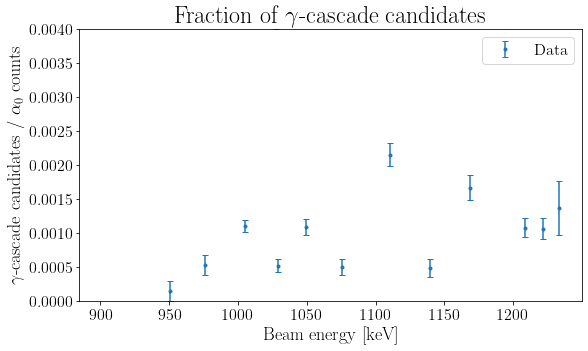

In [12]:
fig, ax = plt.subplots(figsize = [9,5])
ax.set_xlabel('Beam energy [keV]')
ax.errorbar(1.169*np.array(GVs),np.array(cascadeFractionsFixed),cascadeFractionFixedErrs, fmt = '.', capsize = 3, label='Data')
ax.set_ylabel(r'$\gamma$-cascade candidates / $\alpha_0$ counts')
ax.set_title(r'Fraction of $\gamma$-cascade candidates')
ax.set_ylim(0,0.0040)
ax.legend()

In [13]:
cascadeFractionErrs/cascadeFraction

array([0.24956268, 0.10816769, 0.10787789, 0.06582785, 0.13183946,
       0.06961859, 0.08649369, 0.08568596, 0.12390137, 0.09674859,
       0.13715381, 0.10262883, 0.11333821, 0.28887227])

(array([34., 29., 34., 41., 46., 33., 52., 45., 39., 55., 57., 49., 45.,
        51., 48., 48., 57., 59., 57., 64., 49., 49., 57., 46., 61., 55.,
        55., 51., 55., 68., 56., 54., 65., 47., 53., 60., 56., 58., 69.,
        61., 69., 61., 78., 80., 64., 51., 48., 25., 13.,  5.]),
 array([ 9067.92641981,  9124.59012139,  9181.25382297,  9237.91752455,
         9294.58122614,  9351.24492772,  9407.9086293 ,  9464.57233089,
         9521.23603247,  9577.89973405,  9634.56343563,  9691.22713722,
         9747.8908388 ,  9804.55454038,  9861.21824196,  9917.88194355,
         9974.54564513, 10031.20934671, 10087.8730483 , 10144.53674988,
        10201.20045146, 10257.86415304, 10314.52785463, 10371.19155621,
        10427.85525779, 10484.51895938, 10541.18266096, 10597.84636254,
        10654.51006412, 10711.17376571, 10767.83746729, 10824.50116887,
        10881.16487045, 10937.82857204, 10994.49227362, 11051.1559752 ,
        11107.81967679, 11164.48337837, 11221.14707995, 11277.810781

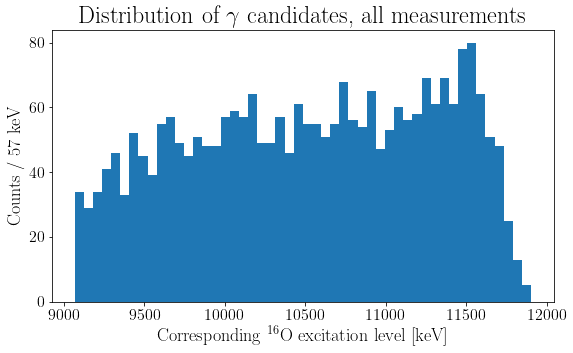

In [14]:
#forsøg at lave et stort histogram:
totalcmEs = exOcalc(np.loadtxt('txts/cascadescmE' + str(GVs[0]) + '.txt'),mHe,mC,mO)
for i in range(len(GVs)):
    if(i == 0):
        continue
    if(i == 1):
        continue #der er alligevel kun en cascade i den her
    data = np.loadtxt('txts/cascadescmE' + str(GVs[i]) + '.txt')
    totalcmEs = np.concatenate([totalcmEs,exOcalc(data,mHe,mC,mO)])
    
fig, ax = plt.subplots(figsize = [9,5])
hist = ax.hist(totalcmEs, bins=50)
ax.set_title(r'Distribution of $\gamma$ candidates, all measurements')
ax.set_xlabel(r'Corresponding $^{16}$O excitation level [keV]')
ax.set_ylabel('Counts / 57 keV')
hist

In [15]:
9067.92641981 - 9124.59012139

-56.663701579998815

Text(0.5, 0, 'Energy of emitted $\\alpha$ particle [keV]')

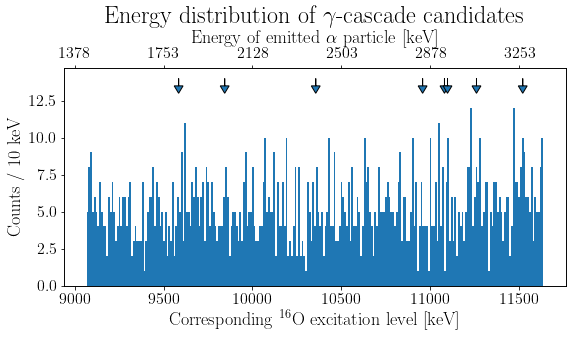

In [96]:
data = exOcalc(np.loadtxt('txts/cascadescmE' + str(GVs[0]) + '.txt'),mHe,mC,mO)
fig, ax = plt.subplots(figsize = [9,4])
ax.set_title(r'Energy distribution of $\gamma$-cascade candidates')
ax.set_xlabel(r'Corresponding $^{16}$O excitation level [keV]')
ax.set_ylabel('Counts / 10 keV')
arrowheight = 14
arrowlength = .5
ax.arrow(9585, arrowheight, 0, -arrowlength, width = 0.05,head_width = 50, head_length=arrowlength)
ax.arrow(9844, arrowheight, 0, -arrowlength, width = 0.05,head_width = 50, head_length=arrowlength)
ax.arrow(10356, arrowheight, 0, -arrowlength, width = 0.05,head_width = 50, head_length=arrowlength)
ax.arrow(10957, arrowheight, 0, -arrowlength, width = 0.05,head_width = 50, head_length=arrowlength)
ax.arrow(11080, arrowheight, 0, -arrowlength, width = 0.05,head_width = 50, head_length=arrowlength)
ax.arrow(11097, arrowheight, 0, -arrowlength, width = 0.05,head_width = 50, head_length=arrowlength)
ax.arrow(11260, arrowheight, 0, -arrowlength, width = 0.05,head_width = 50, head_length=arrowlength)
ax.arrow(11520, arrowheight, 0, -arrowlength, width = 0.05,head_width = 50, head_length=arrowlength)
hist = ax.hist(data, bins=257)

ax2 = ax.twiny()
ax2.set_xticks( ax.get_xticks() )
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels([int(invExOcalc(x)+0.5) for x in ax.get_xticks()])
ax2.set_xlabel(r'Energy of emitted $\alpha$ particle [keV]')

#plt.savefig('txtHists/gammaEnDisb',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)

In [97]:
def invExOcalc(exO):
    def exOfunc(T):
        a = -1
        b = (2*T+2*mHe)
        c = mC**2 - mHe**2
        Ecm = (-b-np.sqrt(b**2 - 4* a * c))/(2*a)
        return Ecm - mO - exO
    result = fsolve(exOfunc,2000)
    return result[0]
invExOcalc(13091)

4445.506183093369

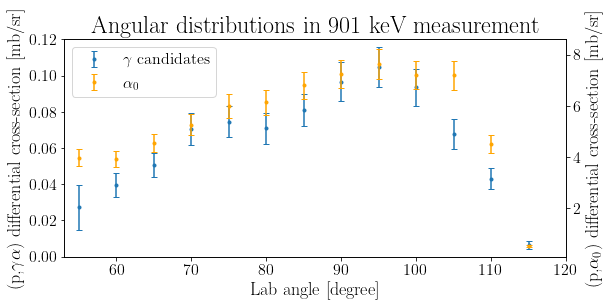

In [98]:
fig, ax = plt.subplots(figsize = [9,4])

data = np.transpose(np.loadtxt('AngCross/angCascadeCross771.txt', skiprows=1))
angle = data[0][11:24]
directCounts = data[1][11:24]
solid = data[2][11:24]
alpha = data[3][11:24]
vcharge = data[4][0]

N_shot = vcharge*5.85e7 * 1/0.93 #0.95 fra kalibrering
rt = 0.4*20e-6/(0.6*12+0.4*15)*6.022*1e23*1e4* 1/np.cos(2*np.pi/360*35) #5/12 * 2.26e6  * 6.022*10e23 / 15 * 40e-9  * 1/np.cos(np.pi/4)
alpha0Cross = alpha / (N_shot * rt * solid) * 1e31
gammaCross = directCounts / (N_shot * rt * solid) * 1e31
alpha0Cross = alpha / (N_shot * rt * solid) * 1e31
rtError = rt*0.05 #antag en fejl på 5% på tykkelsen. Dermed bliver der også en fejl på 5% på rt.
alphaCountError = np.sqrt(alpha)
gammaCountError = np.sqrt(directCounts)
N_shotError = 0.03*N_shot
solidAngError = 0.05*solid
crossErrorAlpha0 = alpha0Cross * np.sqrt( (alphaCountError/alpha)**2 + (rtError/rt)**2 + (N_shotError/N_shot)**2 + (solidAngError/solid)**2)
crossErrorGamma = gammaCross * np.sqrt( (gammaCountError/directCounts)**2 + (rtError/rt)**2 + (N_shotError/N_shot)**2 + (solidAngError/solid)**2)


ax.errorbar(angle,gammaCross,yerr=crossErrorGamma,label=r'$\gamma$ candidates',fmt='.',capsize=3)
ax.errorbar(-1,-1,yerr=1,label=r'$\alpha_0$',fmt='.',capsize=3,color = 'orange')
ax.set_ylim(0,0.12)
ax.set_xlim(53,120)
ax2 = ax.twinx()
ax2.errorbar(angle,alpha0Cross,yerr=crossErrorAlpha0,label=r'$\alpha_0$',fmt='.',capsize=3,color = 'orange')

ax.set_title(r'Angular distributions in 901 keV measurement')
ax.set_ylabel(r'(p,$\gamma\alpha$) differential cross-section [mb/sr]')
ax2.set_ylabel(r'(p,$\alpha_0$) differential cross-section [mb/sr]')
ax.set_xlabel('Lab angle [degree]')
ax.legend()

#plt.savefig('txtHists/gammaAngDisb',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)

In [99]:
crossErrorAlpha0/alpha0Cross

array([0.08526349, 0.07825994, 0.07758079, 0.077653  , 0.07743086,
       0.07745742, 0.07732578, 0.0773806 , 0.07726809, 0.07733208,
       0.0773769 , 0.07762788, 0.08465118])

In [100]:
crossErrorGamma/gammaCross

array([0.45376205, 0.16769682, 0.12860131, 0.12493493, 0.11658605,
       0.12050182, 0.11210114, 0.11170921, 0.10501526, 0.10987647,
       0.12312294, 0.13805033, 0.3254228 ])

In [101]:
cascadeArray = []
t0Array = []
allArray = []

GVs = [771,813,835,860,879,880,898,920,950,975,1000,1034,1045,1055]

for i in range(len(GVs)):
    data = np.transpose(np.loadtxt('AngCross/cascadeFraction'+str(GVs[i])+'.txt',skiprows=1))
    cascades = data[0]
    data = np.loadtxt('txts/noFT0events'+str(GVs[i])+'.txt')
    t0events = data[0]
    allevents = data[1]
    cascadeArray.append(cascades)
    t0Array.append(t0events)
    allArray.append(allevents)

cascadeArray = np.array(cascadeArray)
t0Array = np.array(t0Array)
allArray = np.array(allArray)

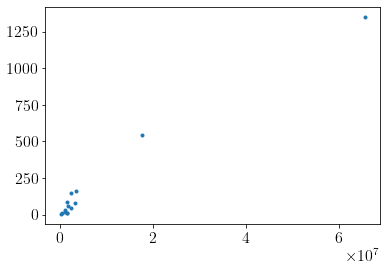

In [102]:
plt.plot(t0Array,cascadeArray,'.')

In [103]:
GVs = [771,813,835,860,879,880,898,920,950,975,1000,1034,1045,1055]

cascadeCounts = []
solids = []
alpha0s = []
vcharges = []

for i in range(len(GVs)):
    data = np.transpose(np.loadtxt('AngCross/angCascadeCross'+str(GVs[i])+'.txt',skiprows=1))
    counts = sum(data[1])
    solid = sum(data[2])
    solid = solid/(4*np.pi)
    alpha0 = sum(data[3])
    vcharge = data[4][0]
    cascadeCounts.append(counts)
    solids.append(solid)
    alpha0s.append(alpha0)
    vcharges.append(vcharge)

cascadeCounts = np.array(cascadeCounts)
solids = np.array(solids)
alpha0s = np.array(alpha0s)
vcharges = np.array(vcharges)

In [104]:
angCrosses = []
angCrossErrs = []

solidAngleErrs = np.transpose(np.loadtxt('SolidAngleErrors.txt',skiprows = 1))[4]

#beregn cross section og fejl
for i in range(len(GVs)):
    N_shot = vcharges[i]*5.85e7 * 1/0.93 #0.95 fra kalibrering
    rt = 0.4*20e-6/(0.6*12+0.4*15)*6.022*1e23*1e4* 1/np.cos(2*np.pi/360*35) #5/12 * 2.26e6  * 6.022*10e23 / 15 * 40e-9  * 1/np.cos(np.pi/4)
    directCross = cascadeCounts[i] / (N_shot * rt * solids[i]) * 1e31
    print(N_shot)
    rtError = rt*0.05 #antag en fejl på 5% på tykkelsen. Dermed bliver der også en fejl på 5% på rt.
    countError = np.sqrt(cascadeCounts[i])
    N_shotError = 0.03*N_shot
    solidAngError = 0.05*solids[i]
    crossError = directCross * np.sqrt( (countError/cascadeCounts[i])**2 + (rtError/rt)**2 + (N_shotError/N_shot)**2 + (solidAngError/solids[i])**2)
    angCrossErrs.append(crossError)
    angCrosses.append(directCross)

19366708064516.13
920714516129.0322
2558085483870.968
11580735483870.967
7130898387096.773
4532554838709.677
6828648387096.773
3902767741935.484
14717090322580.645
6454562903225.806
14284630645161.29
7186756451612.903
10071938709677.418
7489320967741.936


In [105]:
#til at slå op i masses.dat
data = np.transpose(np.loadtxt("masses.txt"))

N=data[0]
Z=data[1]
A=data[2]
massExcess=data[3]
bEPrNkl=data[4]

mp = 938.272*1000
me = 0.510998*1000
mn = 939.565*1000

def me2(a, z):
    a_indices = np.where(A == a)
    z_indices = np.where(Z == z)
    a = lambda: print('Could not find mass excess for given numbers')
    for i in range(len(a_indices[0])):
        if np.any(z_indices[0] == a_indices[0][i]):
            me = bEPrNkl[a_indices[0][i]]
            a = lambda: me
    return a()

def m2(a,z): 
    return mp*z+(a-z)*mn-me2(a,z)*a

mp = 938272.08816
mAl = m2(27,13)
mO = m2(16,8)
mN16 = m2(16,7)
mC13 = m2(13,6)
mO17 = m2(17,8)
mO18 = m2(18,8)
mN15 = m2(15,7)
mN14 = m2(14,7)
mN = m2(15,7)
mC = m2(12,6)
mHe = m2(4,2)
mF = m2(19,9)
mMg = m2(24,12)
mLi = m2(7,3)

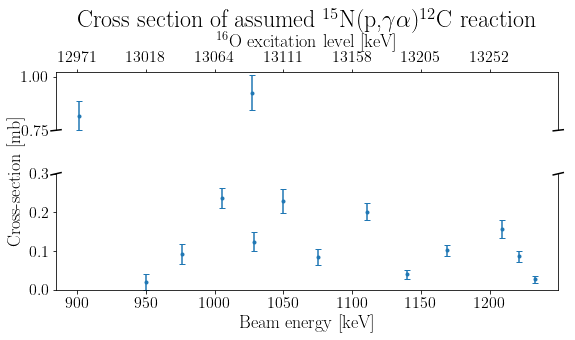

In [106]:
fig, ax = plt.subplots(2,1,figsize = [9,4], gridspec_kw={'height_ratios': [1, 2]})
plt.subplots_adjust(hspace=0.5)

def exOcalc(accE,mb,mt,mO):
    beta = np.sqrt(((accE+mb)**2-mb**2))/(accE+mb+mt)
    pz = np.sqrt((accE+mb)**2-mb**2)
    en = accE + mb + mt
    gamma = 1/np.sqrt(1-beta**2)
    pzCM = gamma*(pz - beta*en)
    enCM = gamma*(en - beta*pz)
    return enCM - mO

ax[1].set_xlabel(r'Beam energy [keV]')
ax[1].errorbar(np.array(GVs)*1.169,angCrosses,yerr=angCrossErrs,fmt='.',capsize = 3)
ax[1].set_ylim(0,0.3)

ax[0].errorbar(np.array(GVs)*1.169,angCrosses,yerr=angCrossErrs,fmt='.',capsize = 3)
ax[0].set_ylim(0.75,1.02)


ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].tick_params(labeltop=True)  # don't put tick labels at the top
ax[1].xaxis.tick_bottom()

ax[0].set_xticks( ax[0].get_xticks() )
ax[0].set_xbound(ax[0].get_xbound())
ax[0].set_xticklabels([int(exOcalc(x,mp,mN,mO)+0.5) for x in ax[0].get_xticks()])
ax[0].set_xlabel(r'$^{16}$O excitation level [keV]')
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top') 

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax[1].transAxes)  # switch to the bottom axes
ax[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel('Cross-section [mb]')

ax[0].set_title(r'Cross section of assumed $^{15}$N(p,$\gamma \alpha$)$^{12}$C reaction')
plt.savefig('txtHists/gammaCross.png',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)

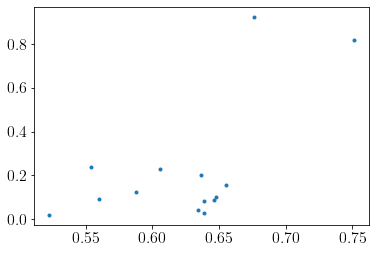

In [108]:
plt.plot(t0Array/allArray,angCrosses,'.')